<a href="https://colab.research.google.com/github/yadavrahyl2k15/Customer-Segmentation-of-mall-customers/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv("/content/Mall_Customers.csv",index_col="CustomerID")
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
x=df[["Annual Income (k$)",	"Spending Score (1-100)"]]
x.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [5]:
from sklearn.cluster import KMeans

we have to find value of k using elbow method/wcss(within cluster sum of square)/interia

In [10]:
wcss=[]
for i in range(1,20):
  kmean=KMeans(n_clusters=i,init="k-means++",random_state=30)
  kmean.fit(x)
  wcss.append(kmean.inertia_)

In [11]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25079.766962115897,
 21850.165282585633,
 19787.670554966855,
 18004.821834846396,
 16372.662146832496,
 14349.754043342278,
 13408.710180900971,
 12097.942504133294,
 10757.366702330066,
 10210.711191001981,
 9257.469907458271,
 8614.39501568338]

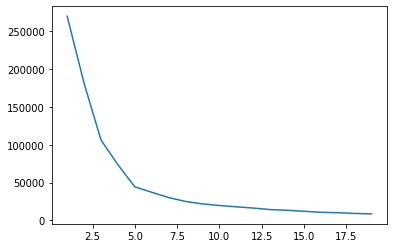

In [12]:
plt.plot(range(1,20),wcss)

In [26]:
kmean=KMeans(n_clusters=5,init="k-means++",random_state=30)
kmean.fit_predict(x)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [27]:
x["cluster_number"]=kmean.fit_predict(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
x.head()

,Annual Income (k$),Spending Score (1-100),cluster_number
CustomerID,,,
1,15,39,4
2,15,81,3
3,16,6,4
4,16,77,3
5,17,40,4


kmean is divisive appraoch i.e. top to bottom approach.

In [29]:
x[x["cluster_number"]==4]

,Annual Income (k$),Spending Score (1-100),cluster_number
CustomerID,,,
1,15,39,4
3,16,6,4
5,17,40,4
7,18,6,4
9,19,3,4
11,19,14,4
13,20,15,4
15,20,13,4
17,21,35,4


In [31]:
from sklearn.cluster import MiniBatchKMeans
mini=MiniBatchKMeans(n_clusters=5)

In [33]:
mini.fit_predict(x[["Annual Income (k$)","Spending Score (1-100)"]])

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [34]:
mini.predict([[45,35]])

array([2], dtype=int32)

In [44]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5,min_samples=4)

In [45]:
dbscan.fit(x[["Annual Income (k$)","Spending Score (1-100)"]])

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [50]:
dbscan.labels_                                       #-1 means consider all of your data as outliers i.e it is considered all data as outliers to treat it we change paramters by hypertunning

array([-1,  0, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  4, -1,  2, -1,  4,  3,  2,  3,  2, -1,  2,  3,  4,
        3,  2,  3,  2,  3,  4, -1,  4,  3,  4, -1,  2,  5,  4,  5,  4,  5,
        2,  5,  4,  3,  2,  3,  2, -1,  4,  3,  4, -1, -1, -1, -1, -1, -1,
        6, -1,  6, -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [51]:
predicted_label=dbscan.labels_

In [47]:
true_label=x["cluster_number"]

evalution of clusters

In [48]:
from sklearn import metrics

In [49]:
metrics.adjusted_rand_score(true_label,predicted_label)

0.5641095154835344

In [53]:
metrics.homogeneity_score(true_label,predicted_label)

0.6007983436060925